In [1]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2
from qiskit import QuantumCircuit , transpile
from qiskit_aer import AerSimulator
import pennylane as qml
from pennylane import numpy as np
import numpy as pop
SIZE = 256

img = cv2.imread( "/home/adminpc/Documents/Professors_Diary/QuantumnComputing/qenv/Qunatumcomputingalgos/Quantumn_image_classification/Images_for_classification/monalisa.jpg"
)

if img is None:
    raise ValueError("Image not found")
else :
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (SIZE, SIZE))
    img_data = []
    img_data.append(pop.array(img)) # Using np.array instead of undefined img_to_array
    img_array = pop.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
    img_array = img_array.astype('float32')
    img_array /= 255.0
    flat = img_array.flatten() # flatten data array
    print("Image loaded and preprocessed successfully.")
    print(flat)

#qbt initilization
n_qubits = 15
n_layers = 20

features = flat[:n_qubits]

print("features" ,features)

inputs = (np.pi/4) * features

print({"Input of the qbits"} , inputs)
dev = qml.device("default.qubit", wires=n_qubits)

# Quantumn Circuit making
@qml.qnode(dev)
def qae(weights):

    # Encode data
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)

    # Variational layers
    for l in range(n_layers):
        for i in range(n_qubits):
            qml.RY(weights[l,i], wires=i)

        for i in range(0, n_qubits-1, 2):
            qml.CNOT(wires=[i, i+1])

    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

## cost functions

def cost_fn(weights):
    output = qae(weights)
    return np.sum((1 - np.array(output))**2)

# assigning random weights 
weights = 0.01 * np.random.randn(n_layers, n_qubits, requires_grad=True)
opt = qml.AdamOptimizer(0.02) ## using adam optimazier one could also use other 

for step in range(200):
    weights = opt.step(cost_fn, weights)
    if step % 20 == 0:
        print("Step", step, "Cost", cost_fn(weights))

print("Optimized weights:", weights)
print(qae(weights))




2026-02-13 00:39:20.939659: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-13 00:39:21.036308: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-13 00:39:23.458076: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
[ WARN:0@3.308] global loadsave.cpp:278 findDecoder imread_('/home/adminpc/Documents/Professors_Diary/QuantumnComputing/qenv/Qunatumcomputingalgos/Quantumn_image_classification/Images_for_classification/monalisa.jpg'): can't open/read file: check file path/integrity


ValueError: Image not found

(1, 15)


2026-02-12 10:21:36.438295: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2026-02-12 10:21:36.533827: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 805306368 exceeds 10% of free system memory.
2026-02-12 10:21:37.648199: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 805306368 exceeds 10% of free system memory.
2026-02-12 10:21:38.124135: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 805306368 exceeds 10% of free system memory.


Epoch 1/10


2026-02-12 10:21:40.519599: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 805306368 exceeds 10% of free system memory.
2026-02-12 10:21:42.306160: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 805306368 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.3344 - loss: 7220.7148 - val_accuracy: 0.4549 - val_loss: 7219.2354
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4549 - loss: 7219.2354 - val_accuracy: 0.5356 - val_loss: 7216.2012
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5356 - loss: 7216.2012 - val_accuracy: 0.5876 - val_loss: 7210.7402
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5876 - loss: 7210.7402 - val_accuracy: 0.6209 - val_loss: 7202.0137
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6209 - loss: 7202.0137 - val_accuracy: 0.6422 - val_loss: 7189.6152
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6422 - loss: 7189.6152 - val_accuracy: 0.6578 - val_loss: 7174.8047
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6578 - loss: 7174.8047 - val_accuracy: 0.6710 - val_loss: 7161.5093
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6710 - loss: 7161.5093 - val_accuracy: 0.6815 -

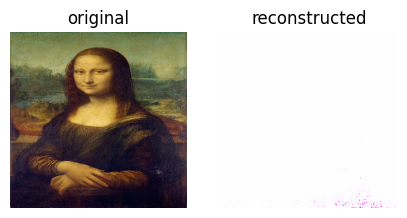

In [4]:
# Decoder part of program

from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
## using adam optimazier one could also use other 

latent = qae(weights)
latent = np.array(latent).reshape(1, n_qubits)
print(latent.shape)
decoder = models.Sequential([
    layers.Input(shape=(n_qubits,)),
    layers.Dense(128, activation="relu"),
    #layers.BatchNormalization(),## OPtimizing batch layers
    layers.Dense(256, activation="relu"),
    #layers.BatchNormalization(),
    layers.Dense(512, activation="relu"),
    #layers.BatchNormalization(),
    layers.Dense(1024 , activation="relu"),
    #layers.BatchNormalization(),
    layers.Dense(256*256*3, activation="sigmoid"),
    layers.Reshape((256,256,3))
])
decoder.compile(optimizer="adam", loss="mse", metrics=["accuracy"])
target = img.reshape(1, 256, 256, 3)
history = decoder.fit(latent, target, epochs=10, shuffle=True, validation_data=(latent, target), verbose=1)
pred = decoder.predict(latent)

plt.figure(figsize =(5 , 5))
plt.subplot(1 ,2 ,1)
plt.title("original")
plt.imshow(img)
plt.axis("off")

plt.subplot(1 ,2 ,2)
plt.title("reconstructed")
plt.imshow(pred[0])
plt.axis("off")
plt.show()



In [ ]:
## ACCURACY AND PLOTTING AND MONITORRING 

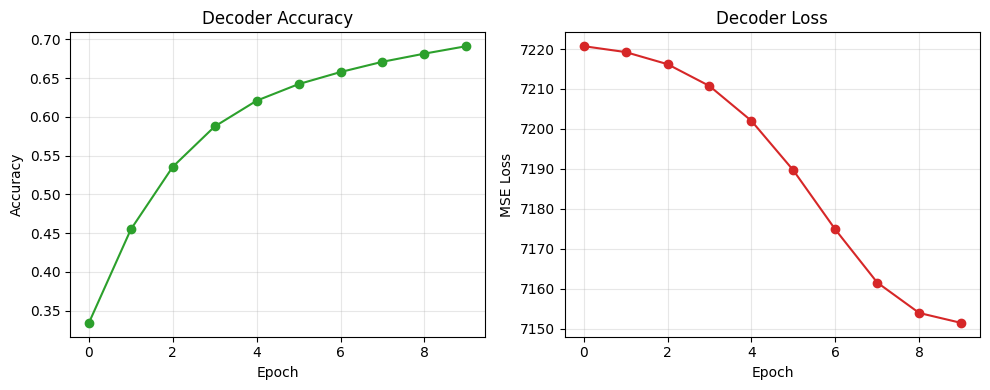

In [5]:

import matplotlib.pyplot as plt

if 'history' not in globals():
    raise NameError("Run the decoder for history of the accuracy and loss")

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history.get('accuracy', []), marker='o', color='tab:green')
plt.title('Decoder Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(alpha=0.3)

plt.subplot(1,2,2)
plt.plot(history.history.get('loss', []), marker='o', color='tab:red')
plt.title('Decoder Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()



In [8]:

import os
import subprocess

if 'history' not in globals():
    raise NameError("Run the decoder training cell first so history exists.")

plots_dir = "/home/adminpc/Documents/Professors_Diary/QuantumnComputing/qenv/Qunatumcomputingalgos/Quantumn_image_classification/plots"
os.makedirs(plots_dir, exist_ok=True)

acc = history.history.get('accuracy', [])
val_acc = history.history.get('val_accuracy', [])
loss = history.history.get('loss', [])
val_loss = history.history.get('val_loss', [])
epochs = list(range(1, len(acc) + 1))

data_path = os.path.join(plots_dir, "autoencoder_training_metrics.dat")
with open(data_path, "w", encoding="utf-8") as f:
    f.write("# epoch accuracy val_accuracy loss val_loss\n")
    for e, a, va, l, vl in zip(epochs, acc, val_acc, loss, val_loss):
        f.write(f"{e} {a} {va} {l} {vl}\n")

script_path = os.path.join(plots_dir, "autoencoder_training_metrics.gnuplot")
out_path = os.path.join(plots_dir, "autoencoder_training_metrics_gnuplot.png")
script = f"""
set terminal pngcairo size 1400,950 enhanced font "Times New Roman,12"
set output "{out_path}"
set multiplot layout 2,2 title "Autoencoder Training Metrics"
set datafile separator whitespace
set grid
set key outside
set xlabel "Epoch"
set ylabel "Accuracy"
set title "Accuracy"
plot "{data_path}" using 1:2 with linespoints lw 2 pt 7 ps 1 lc rgb "#2E8B57" title "accuracy"
set xlabel "Epoch"
set ylabel "Validation Accuracy"
set title "Validation Accuracy"
plot "{data_path}" using 1:3 with linespoints lw 2 pt 7 ps 1 lc rgb "#1E90FF" title "val_accuracy"
set xlabel "Epoch"
set ylabel "MSE Loss"
set title "Loss"
plot "{data_path}" using 1:4 with linespoints lw 2 pt 7 ps 1 lc rgb "#B22222" title "loss"
set xlabel "Epoch"
set ylabel "Validation Loss"
set title "Validation Loss"
plot "{data_path}" using 1:5 with linespoints lw 2 pt 7 ps 1 lc rgb "#6A0DAD" title "val_loss"
unset multiplot
"""
with open(script_path, "w", encoding="utf-8") as f:
    f.write(script)

subprocess.run(["gnuplot", script_path], check=True)
print("Saved:", out_path)



Saved: /home/adminpc/Documents/Professors_Diary/QuantumnComputing/qenv/Qunatumcomputingalgos/Quantumn_image_classification/plots/autoencoder_training_metrics_gnuplot.png
